# EDA + Missing Value + Outlier + ML Model

## Data Description
The Dataset The Census Income dataset has 48,842 entries.
Each entry contains the following information about an individual:
* **age:** The age of an individual.Integer greater than 0
* **workclass:** A general term to represent the employment status of an individual ○ Private, Selfempnotinc, Selfempinc, Federalgov, Localgov, Stategov, Withoutpay, Neverworked.
* **fnlwgt:** Final weight. In other words, this is the number of people the census believes the entry represents. Integer greater than 0
* **education:** The highest level of education achieved by an individual. Bachelors, Somecollege, 11th, HSgrad, Profschool, Assocacdm, Assocvoc, 9th, 7th8th, 12th, Masters, 1st4th, 10th, Doctorate, 5th6th, Preschool.
* **educationnum:** The highest level of education achieved in numerical form. Integer greater than 0
* **maritalstatus:** Marital status of an individual. Marriedcivspouse corresponds to a civilian spouse while MarriedAFspouse is a spouse in the Armed Forces. Marriedcivspouse, Divorced, Nevermarried, Separated, Widowed, Marriedspouseabsent, MarriedAFspouse.
* **occupation:** The general type of occupation of an individual. Techsupport, Craftrepair, Otherservice, Sales, Execmanagerial, Profspecialty, Handlerscleaners, Machineopinspct, Admclerical, Farmingfishing, Transportmoving, Privhouseserv, Protectiveserv, ArmedForces.
* **relationship:** Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all ○ Wife, Ownchild, Husband, Notinfamily, Otherrelative, Unmarried.
* **race:** Descriptions of an individual’s race. White, AsianPacIslander, AmerIndianEskimo, Other, Black.
* **sex:** The biological sex of the individual. Male, Female
* **capitalgain:** Capital gains for an individual. Integer greater than or equal to 0
* **capitalloss:** Capital loss for an individual. Integer greater than or equal to 0
* **hoursperweek:** The hours an individual has reported to work per week. continuous.
* **nativecountry:** Country of origin for an individual. UnitedStates, Cambodia, England, PuertoRico, Canada, Germany, OutlyingUS(Guam,USVI,etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, DominicanRepublic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.
* **income:** Whether or not an individual makes more than $50,000 annually. <=50k, >50k

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
df=pd.read_csv('adult.csv',na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

## Univariate Analysis

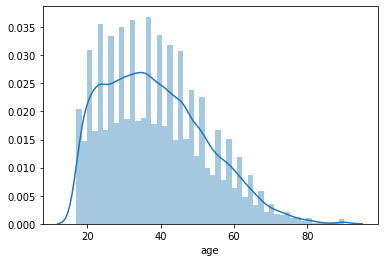

In [8]:
sns.distplot(df['age'])

More number people around 35-45 years

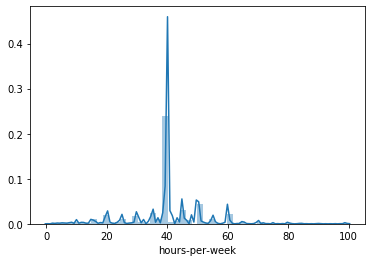

In [9]:
sns.distplot(df['hours-per-week'])

40 hours per week for maximum people

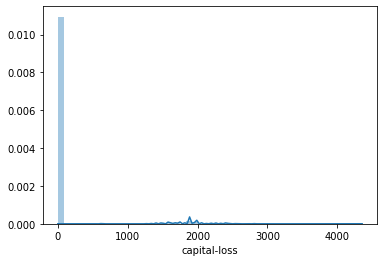

In [10]:
sns.distplot(df['capital-loss'])

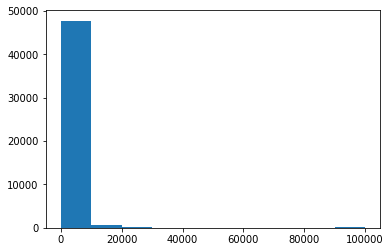

In [11]:
plt.hist(df['capital-gain'])
plt.show()

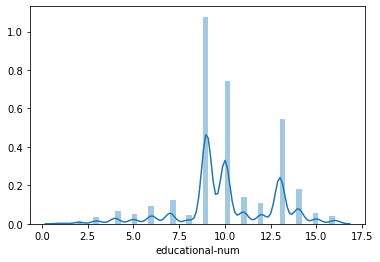

In [12]:
sns.distplot(df['educational-num'])

Maximum educational num is around 9

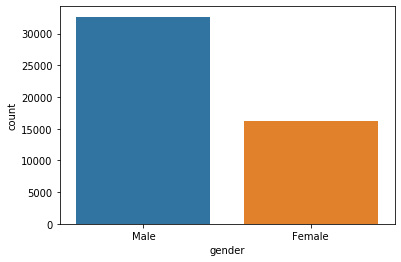

In [13]:
sns.countplot(df['gender'])

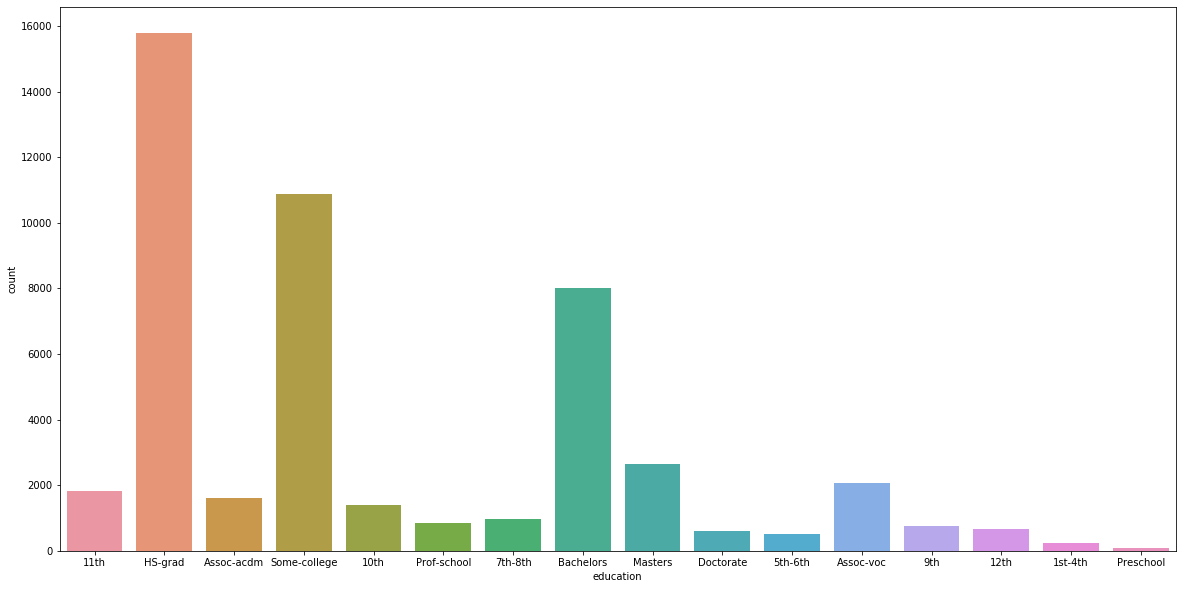

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'])

Most of the individuals are HS-grad

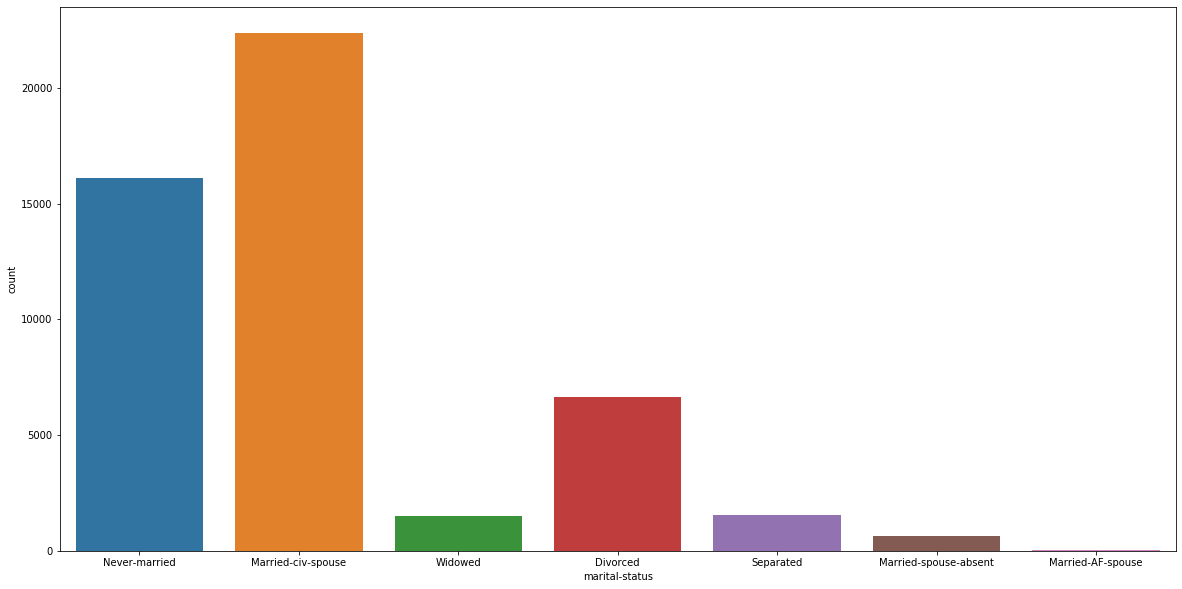

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df['marital-status'])

Most of the individuals are Married-civ-spouse

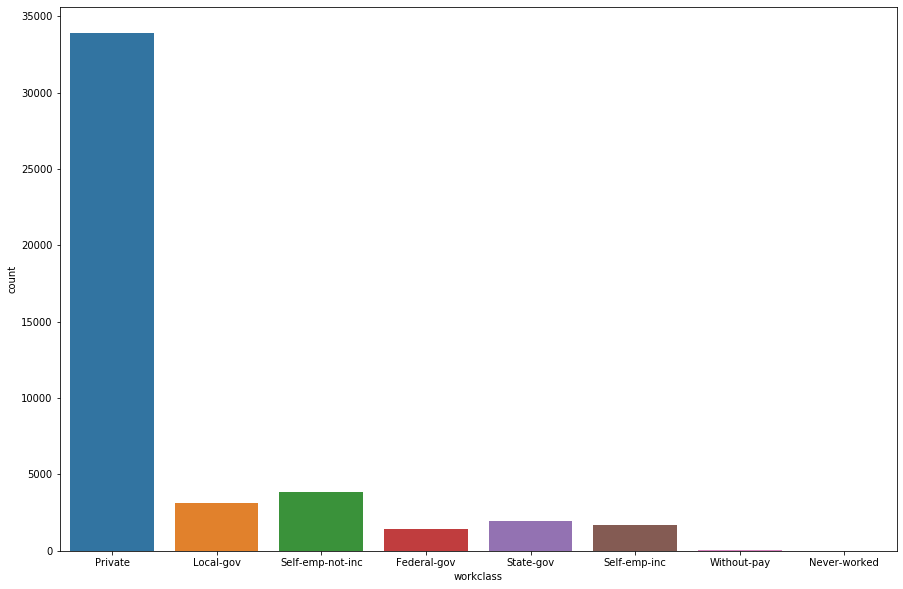

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(df['workclass'])

Most of the individuals have private workclass

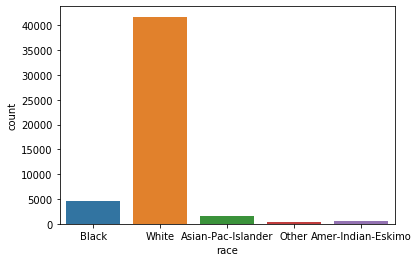

In [17]:
sns.countplot(df['race'])

Most of the individuals have 'white' race

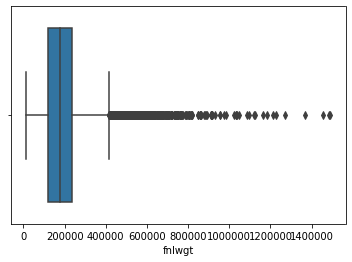

In [18]:
sns.boxplot(df['fnlwgt'])

Mean final-weight is around 2 lakhs but there are more outliers ranging from 4 lakhs

## Bivariate Analysis

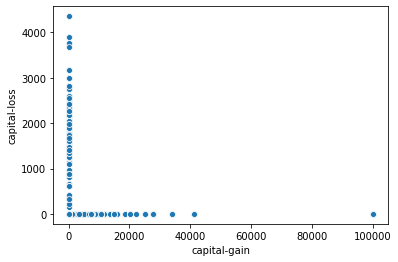

In [19]:
sns.scatterplot(x='capital-gain',y='capital-loss',data=df)

As the capital gain increases the capital loss decreases and vice-versa.

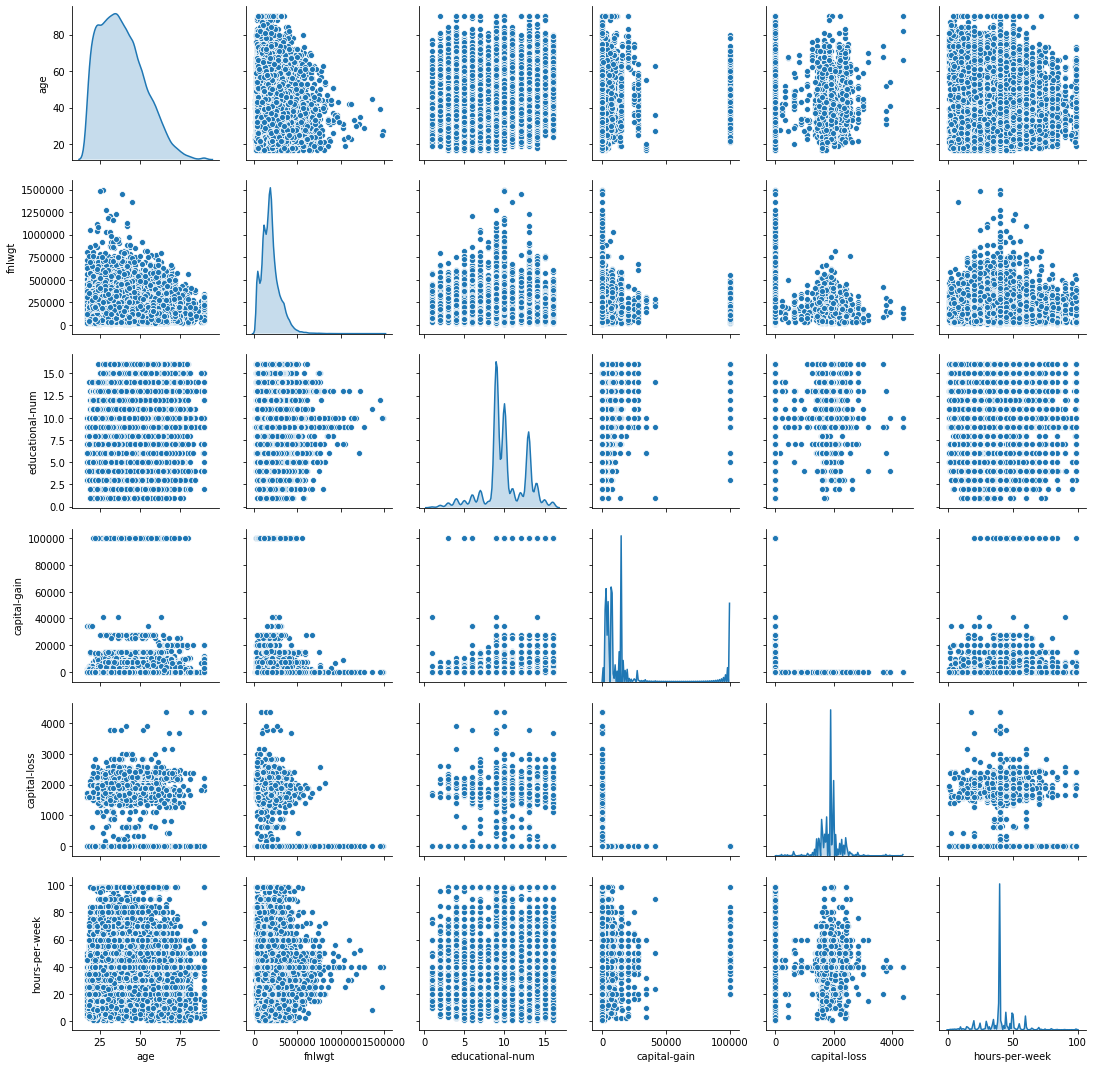

In [20]:
sns.pairplot(df,diag_kind='kde');

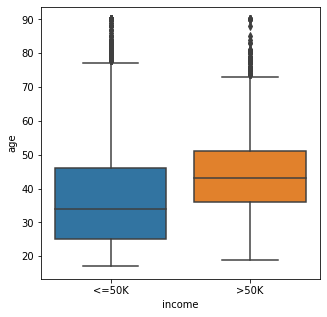

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="age", data=df)
plt.show()

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).

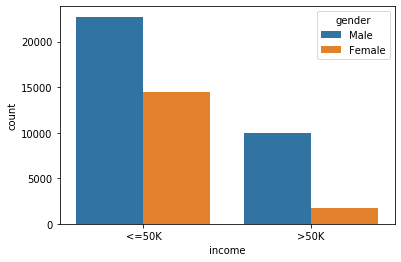

In [22]:
sns.countplot(df['income'],hue='gender',data=df)

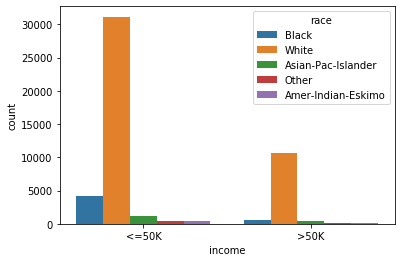

In [23]:
sns.countplot(df['income'],hue='race',data=df)

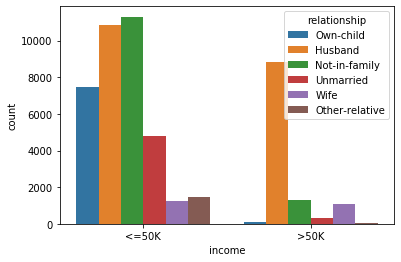

In [24]:
sns.countplot(df['income'],hue='relationship',data=df)

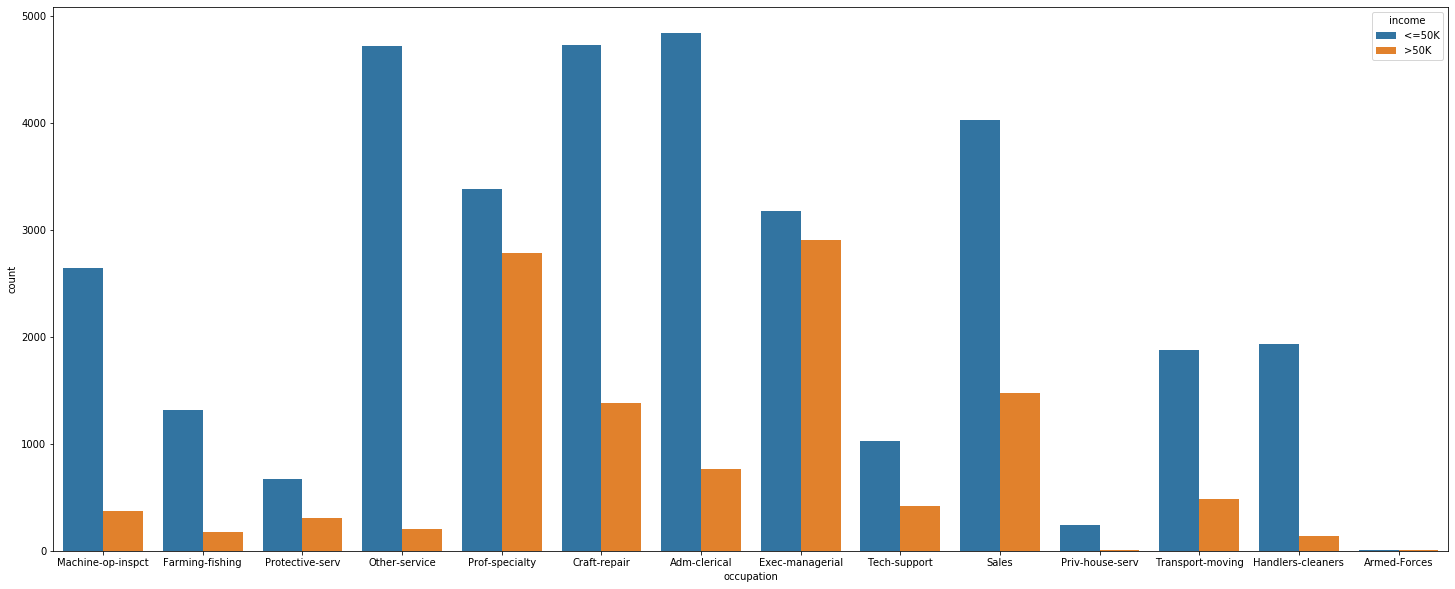

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(x = df['occupation'], hue = df['income'])
plt.show()

There are more no of candidates from craft-repair and admin-clerical are earning <50000.

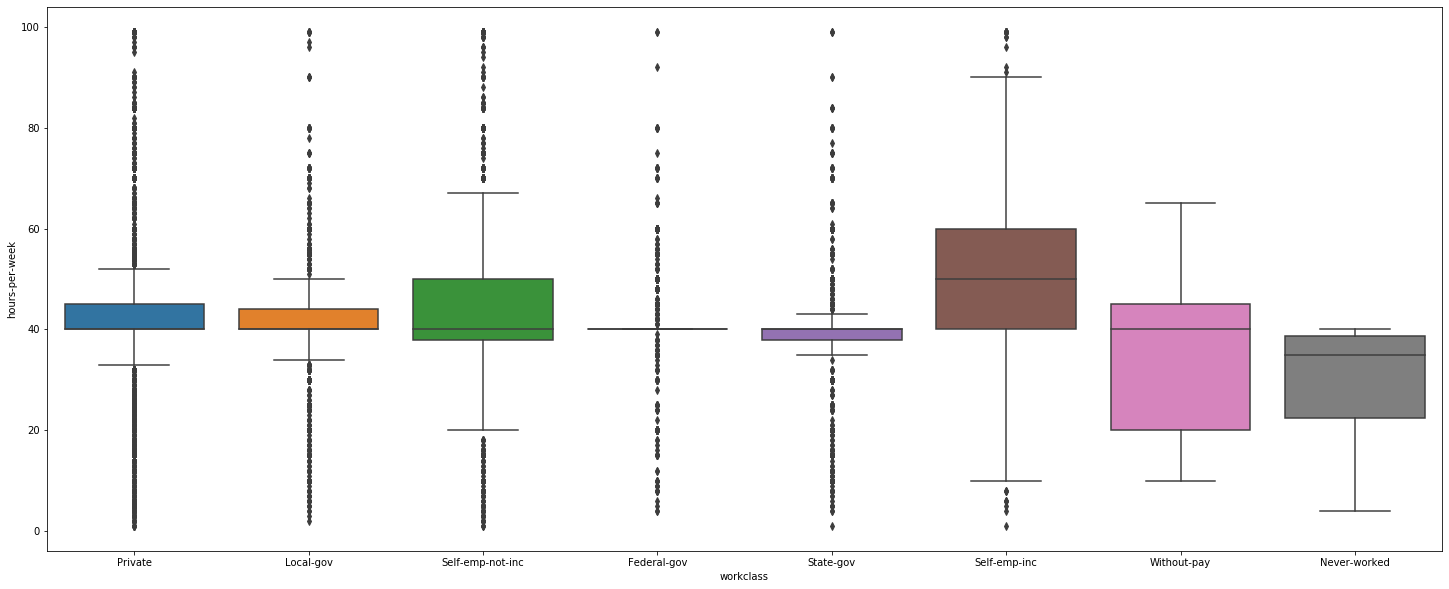

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(x='workclass',y='hours-per-week',data=df)

People are working all around from 0 to 100 hrs even though the avg is 40 hrs.

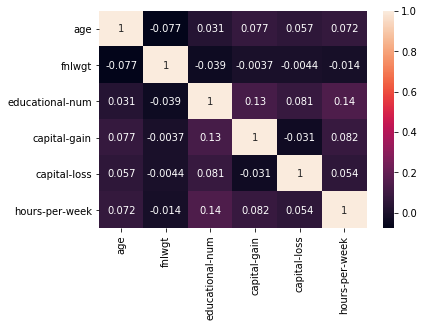

In [27]:
sns.heatmap(df.corr(),annot=True)

## Handling with missing values and outliers

In [28]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Fill null values with bfill

In [29]:
df.fillna(method='bfill',inplace=True)

In [30]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Using Z score

In [31]:
from scipy import stats
z = np.abs(stats.zscore(df[['age','fnlwgt','educational-num','hours-per-week']]))
z

array([[0.99512893, 0.35167453, 1.19725891, 0.03408696],
       [0.04694151, 0.94552415, 0.41933527, 0.77292975],
       [0.77631645, 1.3947231 , 0.74755018, 0.03408696],
       ...,
       [1.41180837, 0.35751025, 0.41933527, 0.03408696],
       [1.21394141, 0.11198424, 0.41933527, 1.64812038],
       [0.97418341, 0.93049361, 0.41933527, 0.03408696]])

In [32]:
threshold = 3

result = np.where(z > 3)
result

(array([   25,   157,   188, ..., 48806, 48806, 48812], dtype=int64),
 array([3, 1, 1, ..., 0, 3, 3], dtype=int64))

In [33]:
outlier_df = pd.DataFrame(data=result[0], columns=['RN'])

outlier_df['CN'] = result[1]
outlier_df.head()

,RN,CN
0,25,3
1,157,1
2,188,1
3,234,0
4,288,1


In [34]:
columns = df.columns
outlier_df['COLNAME'] = columns[outlier_df.CN]
outlier_df

,RN,CN,COLNAME
0,25,3,education
1,157,1,workclass
2,188,1,workclass
3,234,0,age
4,288,1,workclass
5,309,3,education
6,323,2,fnlwgt
7,338,3,education
8,354,3,education
9,357,3,education


## Treating Outliers

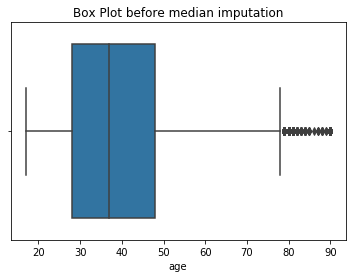

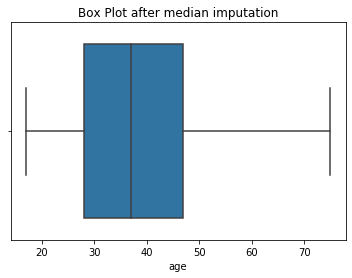

In [35]:
sns.boxplot(df['age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.73)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['age'])
for i in df['age']:
    if i > Upper_tail or i < Lower_tail:
            df['age'] = df['age'].replace(i, med)
sns.boxplot(df['age'])
plt.title("Box Plot after median imputation")
plt.show()

In [36]:
Q1=df['fnlwgt'].quantile(0.25)
Q3=df['fnlwgt'].quantile(0.72)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

117550.5
226837.87999999977
109287.37999999977
-46380.56999999966 390768.94999999943


In [37]:
df = df[(df.fnlwgt>Lower_Whisker) & (df.fnlwgt<Upper_Whisker)]

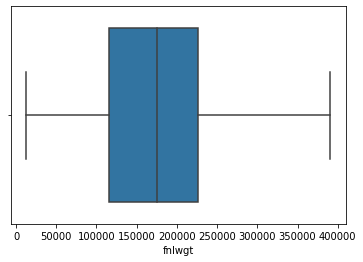

In [38]:
sns.boxplot(df.fnlwgt)

## Feature Transformation

In [39]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education=df.education.replace('HS-grad','high school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education=df.education.replace('Bachelors','undergrad')
df.education=df.education.replace('Masters','grad')
df.education=df.education.replace('Doctorate','doc')

In [40]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital-status']=df['marital-status'].replace('Never-married','not married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [41]:
df['marital-status'].value_counts()

Married        21501
not married    15288
other           9925
Name: marital-status, dtype: int64

In [42]:
df.income=df.income.replace('<=50K',0)
df.income=df.income.replace('>50K',1)

In [43]:
df['income'].value_counts()

0    35474
1    11240
Name: income, dtype: int64

## Model Building

In [44]:
X= df.drop(['income'], axis=1)
y = df['income']

In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [46]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,4,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,3,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,3,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,3,9,1,7,3,4,0,0,0,29,38,0


In [47]:
stdsc= StandardScaler().fit(df1.drop('income', axis=1))

In [48]:
X= stdsc.transform(df1.drop('income', axis=1))
y= df['income']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Test data: {:,.3f}".format(lr.score(X_test, y_test)))

Training data: 0.838
Test data: 0.836


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Test data: {:,.3f}".format(rfc.score(X_test, y_test)))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training data: 0.988
Test data: 0.850


Random Forest has better accuracy

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [53]:
confusion_matrix(y_test, prediction1)

array([[9974,  711],
       [1385, 1945]], dtype=int64)

In [54]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10685
           1       0.73      0.58      0.65      3330

    accuracy                           0.85     14015
   macro avg       0.81      0.76      0.78     14015
weighted avg       0.84      0.85      0.84     14015

